# **Auther Name : [Muhammad Irfan](https://www.linkedin.com/in/muhammad-irfan-a15359247/)** 

# **What Is Neural Network ?**

A neural network is a computer program inspired by the `brain` that learns from examples to recognize patterns and make decisions.


## **Let Create a Simple Neural Network.**






**Import Libraries**

In [32]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# **Load the Dataset & Preprocess**

In [33]:
df = sns.load_dataset("titanic")  

# Drop row with the data missing values
df.dropna(subset=["age", "embarked"], inplace=True)

# Convert Categorical Data into Numeric data using get dummies function
df = pd.get_dummies(df,  columns=['sex', 'embarked', 'class', 'who', 'deck'])

# Select Features and Target Variables 
X = df.drop(['survived', 'alive', 'embark_town', 'adult_male', 'alone'], axis=1)
y = df['survived']

# Split Data into X and y 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



# **Build The Model With Neural Network**

 ## **`Why we Make Layers Before During to build the Model ?`**

 We create layers in a neural network to organize and process information at `different levels of abstraction`, allowing the model to learn complex patterns by building hierarchical representations of data.






## `What is Early Stop Callback Function ?`

The Early Stop Callback Function interrupts the training process of a machine learning model when a specified metric stops improving, preventing overfitting and enhancing generalization performance. 

It's commonly used in neural network training to halt iterations early based on predefined criteria, such as no improvement in **`validation loss`**.






## `What is Validation Dataset ?`

A validation dataset is a portion of the overall dataset that is set aside and **`not used during the training phase`** of a machine learning model. Instead, it is employed to evaluate the performance of the trained model, providing an indication of how well the model generalizes to unseen data.






## `What is Validation Loss ?`

- Validation loss is the error calculated on a separate dataset, evaluating the model's performance on unseen data.
- It serves as a metric for assessing how well the model generalizes beyond the training data, with **`lower values indicating better performance`**.

In [34]:
# Define the Layers 
input_layer = tf.keras.layers.Dense(10, activation="relu" , input_shape=[X_train.shape[1],])

output_layer = tf.keras.layers.Dense(1 , activation= "sigmoid")

# Import Early stop Function
from tensorflow.keras.callbacks import EarlyStopping

# Define The Call Back Function
earlystop = EarlyStopping(patience=5)

# Combine the Layers  into Model
model = tf.keras.Sequential([input_layer, output_layer])

# Compile the Model 
model.compile(optimizer="adam" , 
              loss="binary_crossentropy",
              metrics = ["accuracy"])
 

# **Fit The Model In Training Data**

In [35]:
history = model.fit(X_train , y_train , epochs=50 , verbose=1 , batch_size=32 ,
          validation_data=(X_test,y_test),
          callbacks = [earlystop])

Epoch 1/50


18/18 [==============================] - 1s 16ms/step - loss: 0.7990 - accuracy: 0.4464 - val_loss: 0.7631 - val_accuracy: 0.5245
Epoch 2/50
18/18 [==============================] - 0s 6ms/step - loss: 0.7332 - accuracy: 0.5940 - val_loss: 0.7102 - val_accuracy: 0.5944
Epoch 3/50
18/18 [==============================] - 0s 11ms/step - loss: 0.6833 - accuracy: 0.6696 - val_loss: 0.6655 - val_accuracy: 0.6503
Epoch 4/50
18/18 [==============================] - 0s 7ms/step - loss: 0.6395 - accuracy: 0.7065 - val_loss: 0.6265 - val_accuracy: 0.6783
Epoch 5/50
18/18 [==============================] - 0s 7ms/step - loss: 0.6018 - accuracy: 0.7293 - val_loss: 0.5910 - val_accuracy: 0.7343
Epoch 6/50
18/18 [==============================] - 0s 8ms/step - loss: 0.5656 - accuracy: 0.7487 - val_loss: 0.5631 - val_accuracy: 0.7413
Epoch 7/50
18/18 [==============================] - 0s 7ms/step - loss: 0.5357 - accuracy: 0.7768 - val_loss: 0.5415 - val_accuracy: 0.7552
Epoch 8/50
18/18 [===========

In [36]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy}")
print(f"Test Loss: {loss}")

5/5 [==============================] - 0s 2ms/step - loss: 0.4596 - accuracy: 0.7832
Test Accuracy: 0.7832167744636536
Test Loss: 0.45964550971984863


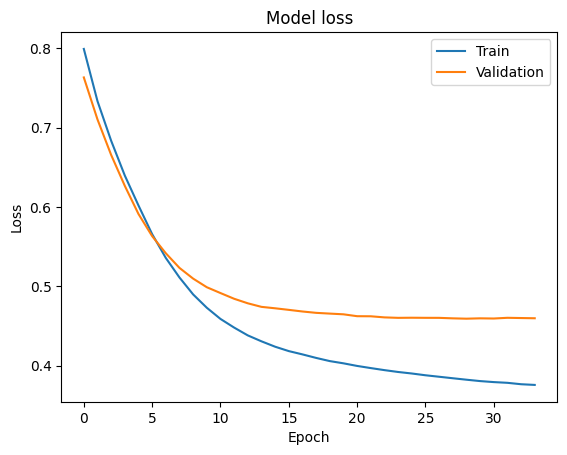

In [37]:
# Plotting the training and testing loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()